<a href="https://colab.research.google.com/github/Aithavarsha/LGMVIP-DataScience/blob/main/Stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
import numpy as np

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout

In [6]:
df = pd.read_csv('/content/stock dataset.csv')

In [7]:
dataset = df.values

In [8]:
training_data = dataset[:500, 1:2]

In [9]:
training_data

array([[234.05],
       [234.55],
       [240.0],
       [233.3],
       [233.55],
       [235.0],
       [235.95],
       [237.9],
       [233.15],
       [223.45],
       [216.35],
       [222.5],
       [222.5],
       [221.0],
       [224.0],
       [222.0],
       [238.2],
       [236.0],
       [237.0],
       [235.35],
       [233.85],
       [237.0],
       [231.8],
       [234.5],
       [240.3],
       [246.9],
       [244.0],
       [240.8],
       [236.05],
       [235.0],
       [233.0],
       [237.3],
       [236.65],
       [237.25],
       [241.0],
       [235.15],
       [236.0],
       [232.5],
       [248.7],
       [243.4],
       [243.7],
       [241.0],
       [235.9],
       [248.5],
       [244.0],
       [238.9],
       [231.25],
       [239.7],
       [248.4],
       [241.55],
       [257.9],
       [265.0],
       [270.4],
       [274.8],
       [275.9],
       [268.25],
       [269.8],
       [277.45],
       [281.0],
       [264.5],
       [271.0],
       

In [10]:
testing_data = dataset[500:, 1:2]

In [11]:
testing_data

array([[138.9],
       [139.15],
       [138.0],
       ...,
       [121.8],
       [120.3],
       [122.1]], dtype=object)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
training_data_scaled = scaler.fit_transform(training_data)

In [13]:
x_train = []
y_train = []
for i in range(60, len(training_data)):
    x_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [14]:
x_test = []
for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model = Sequential()

In [16]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [17]:
model.compile(optimizer='adam', loss='mean_sqaured_error')

In [18]:
predicted_stock_price = model.predict(x_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

14/14 [==============================] - 2s 28ms/step


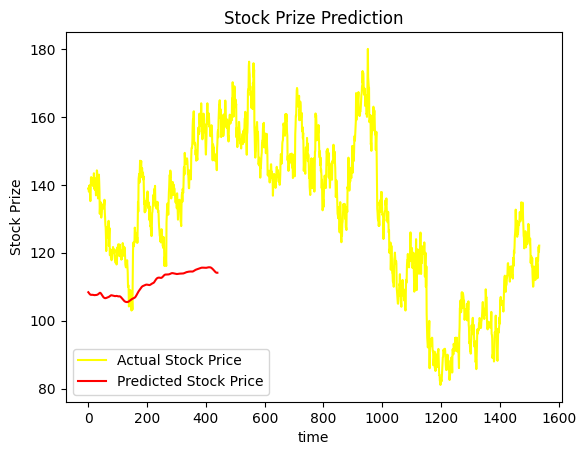

In [22]:
import matplotlib.pyplot as plt
plt.plot(testing_data, color='yellow', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Prize Prediction')
plt.xlabel('time')
plt.ylabel('Stock Prize')
plt.legend()
plt.show()